# K NEAREST NEIGHBORS

# Name: Ioana Lupascu



### Load the required libraries

In [51]:
#It might be useful to load the ones you know you will use first, and then as you figure out what other ones you need
#come back here and load those ones in as well

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as st

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#Libraries for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


### Load the diabetes dataset and name it 'df'

In [2]:
df = pd.read_csv('diabetes.csv')

### Print the first 10 rows of the dataframe

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Print the shape of the dataset, how many rows does it have?

In [4]:
df.shape

(1536, 9)

### Describe the dataset

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Count tells us the number of NoN-empty rows in a feature. There are 768 counts of each feature.
The table shows the  mean and Standard Deviation Value of each feature.
The rane of each feature lies between the minimum value (min) and maximum value (max) of each feature.
Outliers can be determined for each feature if they lie outisde of the 25%, 50%, and 75% percentile/quartile bound presented for each feature above.


### Data Cleaning:

- Perform any data cleaning or data transformation steps if required
- State some of the data cleaning steps which you can perform on **any** data set

Steps I am taking to clean the data:
- First, I look at the distribution of each dataset visually (histograms for all columns)
- I will look to see whether data is normally distributed or skewed
- Replace 0's with NaN's where appropriate
- I replace NaN's with the mean for normal distributions. 
- I replace NaN's with the mode for skewed distributions. 
- This method is called imputing the data. Deletion is also an available tool for cleaning data. 


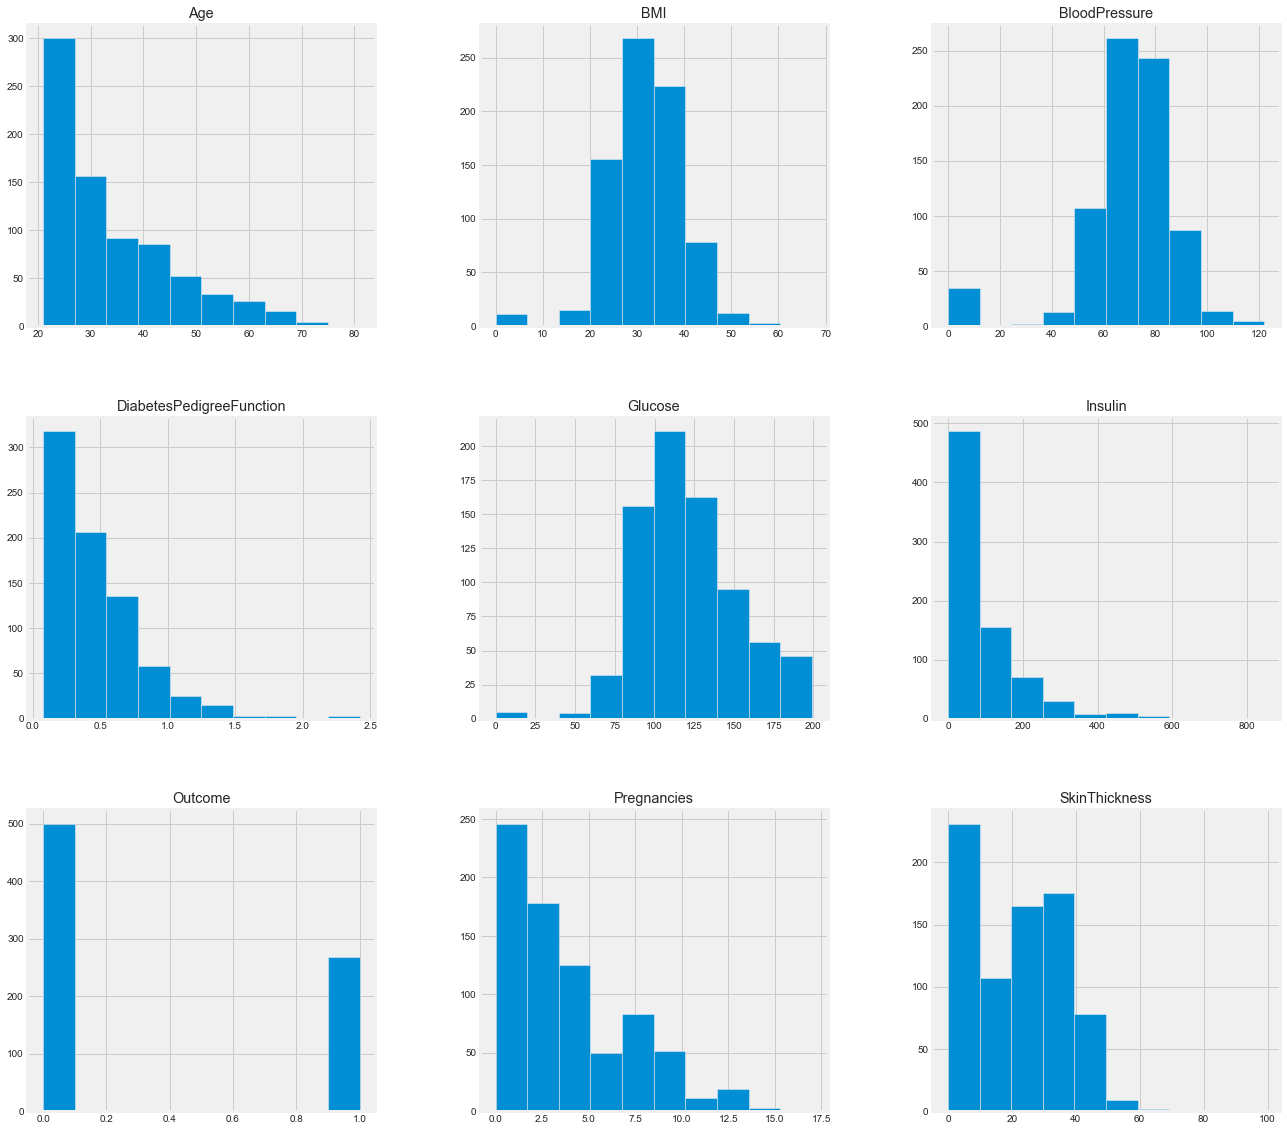

In [6]:
p = df.hist(figsize = (20,20))

In [33]:
df2 = df.copy()
df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df2



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1531,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1.0
1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df3 = df2.dropna()
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
3,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
5,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
7,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
9,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
1527,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
1529,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
1531,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
1533,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [41]:
#count NaN's
df2.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     768
dtype: int64

In [36]:
df2['Pregnancies'].fillna(df2['Pregnancies'].median(), inplace = True)
df2['Glucose'].fillna(df2['Glucose'].mean(), inplace = True)
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(), inplace = True)
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace = True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace = True)
df2['BMI'].fillna(df2['BMI'].median(), inplace = True)
df2['Age'].fillna(df2['Age'].median(), inplace = True)
df2['DiabetesPedigreeFunction'].fillna(df2['DiabetesPedigreeFunction'].median(), inplace = True)

In [42]:
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
3,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
5,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
7,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
9,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
1527,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
1529,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
1531,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
1533,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa038035790>,
      dtype=object)

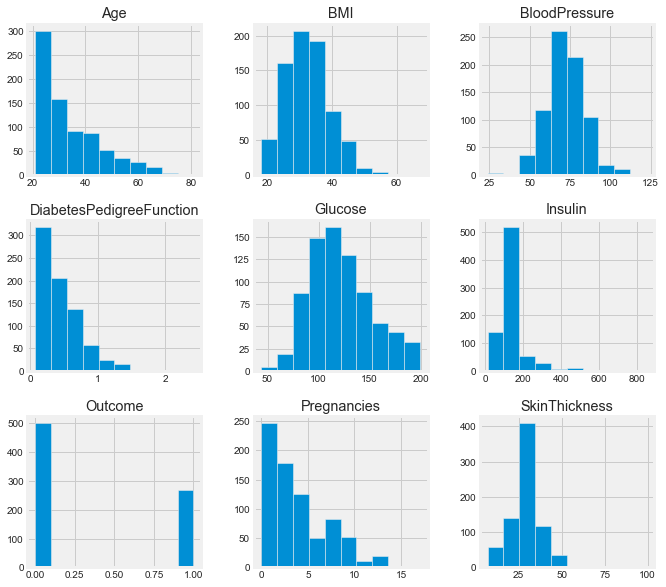

In [43]:
df3.hist(figsize = (10,10))

Visualizaiton of Features and Outcome

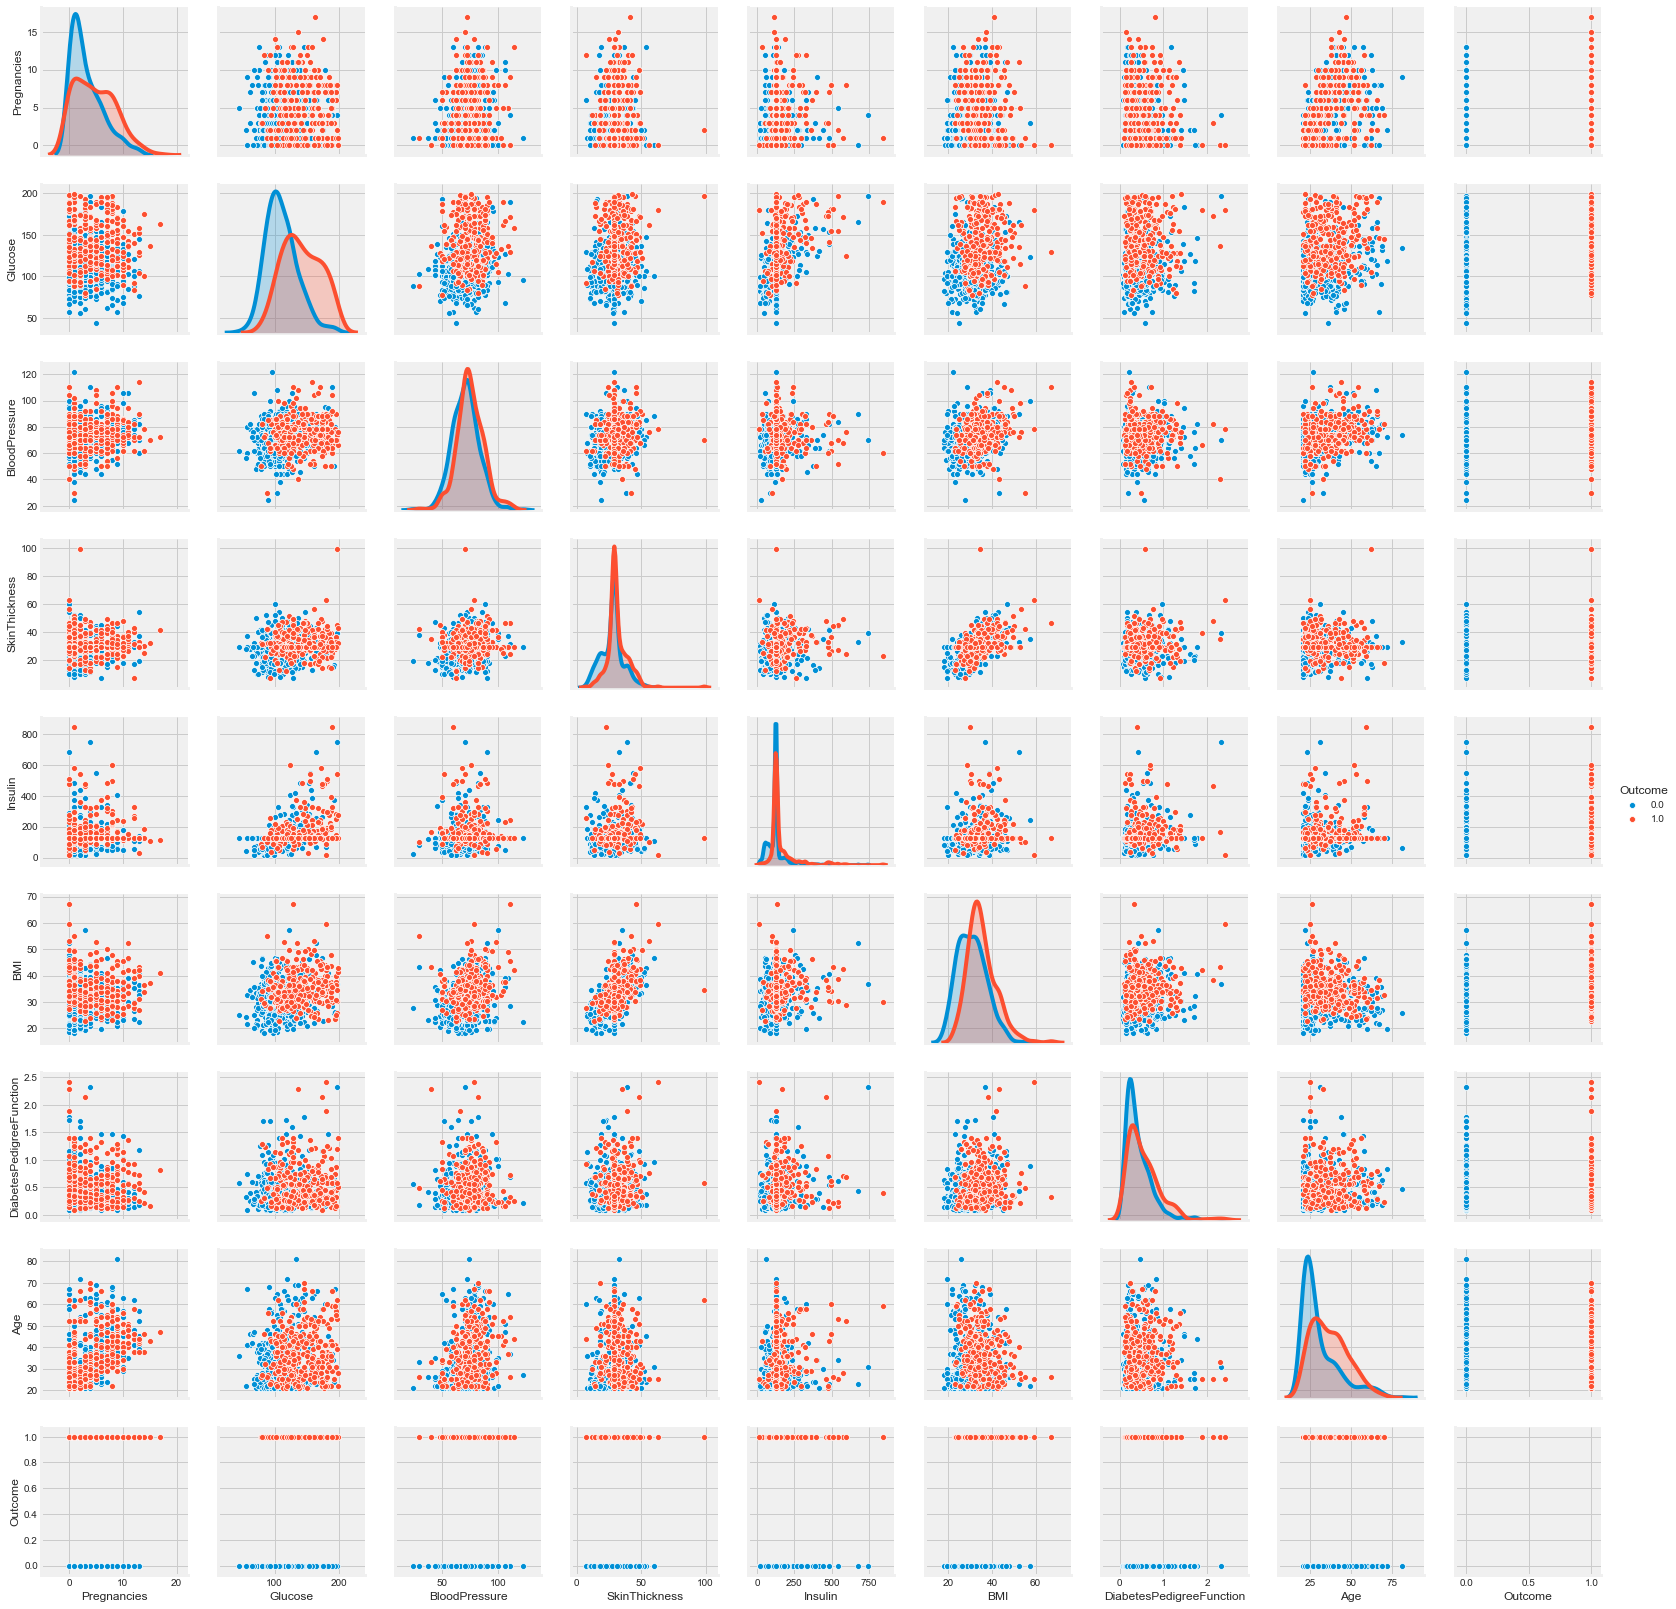

In [44]:
plot = sns.pairplot(df3, hue = 'Outcome')

### Create two dataframes for features and target variables

In [45]:
df3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df3[feature_columns].values
y = df3['Outcome'].values

### Label Encoding

- Do we need to perform label encoding in this data set?

No, label encoding is not necessary becuase the output variable is not categorical. 

### Split the data set into training and testing data (70% Training)

In [49]:
#X_train,X_test,y_train,y_test = ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Why do we create training and testing data? What is the reason of splitting the data into different data sets?

A training dataset is a sample of data used to fit a model. The model sees and learns from the training dataset. 
The reamining data becomes the test dataset, which is used as an evaluation of the model that was fit on the training dataset. 


### Explain KNN algorithm in your own words:


The K Nearest Neighbors model finds the proximity between a test point and nearby points. KNN is a lazy algorithm. This means it does not use the training data points to do any generalization. KNN is based on feature similarity - it figures out how closely out of sample features resemble our training set and classifies the given data point based on proximity to points in different clusters. Then, it predicts the outcome of the test points relative to which neighbors were closest.

### Building a basic KNN model with K = 5

In [52]:
#You just need to create the model here, just like we did for LinearRegression() or LogisticRegression()

classifier = KNeighborsClassifier(n_neighbors=5)

### Fit the model on train data

In [53]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predict the test set results

In [55]:
y_pred = classifier.predict(X_test)
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1.

### Evaluation Metrics:

- Confusion Matrix
- Accuracy

### Build a confusion matrix

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

[[129  28]
 [ 36  38]]


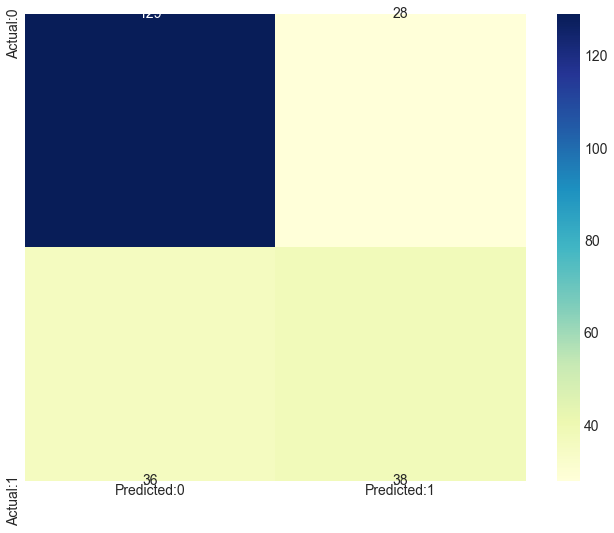

In [62]:
conf_matrix=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

### Please explain your confusion matrix:

#Explain what each entry represents

From my confusion matrix, I see that we have 129 True Negatives. 129 observations were correctly predicted as negative. We have 28 False positives, so our model incorrectly predicted 28 observations as being positive when they were negative. We have 36 False Negatives, so 36 observations were incorrectly predicted to be negative when they were positive, and there were 38 True Positives (correclty predicted).

### Accuracy of the model

In [57]:
accuracy = accuracy_score(y_test, y_pred)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 72.29%


### Do you think the model accuracy can be improved? State any one way to improve the accuracy of the model?

The accuracy of a KNN model can be improved using scaling. KNN is distance-based, and sometimes the features we use are not at the same scale/ unites. Rescaling helps build a more accurate model. Several scaling methods exist: Min-Max scaling, Standard scaling, Robust scaling. We can also tune hyperparameters to further improve accuracy.

### Cross Validation

In [58]:
#Create a range from 1 to 50 going at steps of 2

# creating a list of K for KNN
k_list = list(range(1,50,2))

#then make a list where you will store average accuracy at each k value
cv_scores = []

#use a for loop to compute the average accuracy over 10-fold cross validation for each k value
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

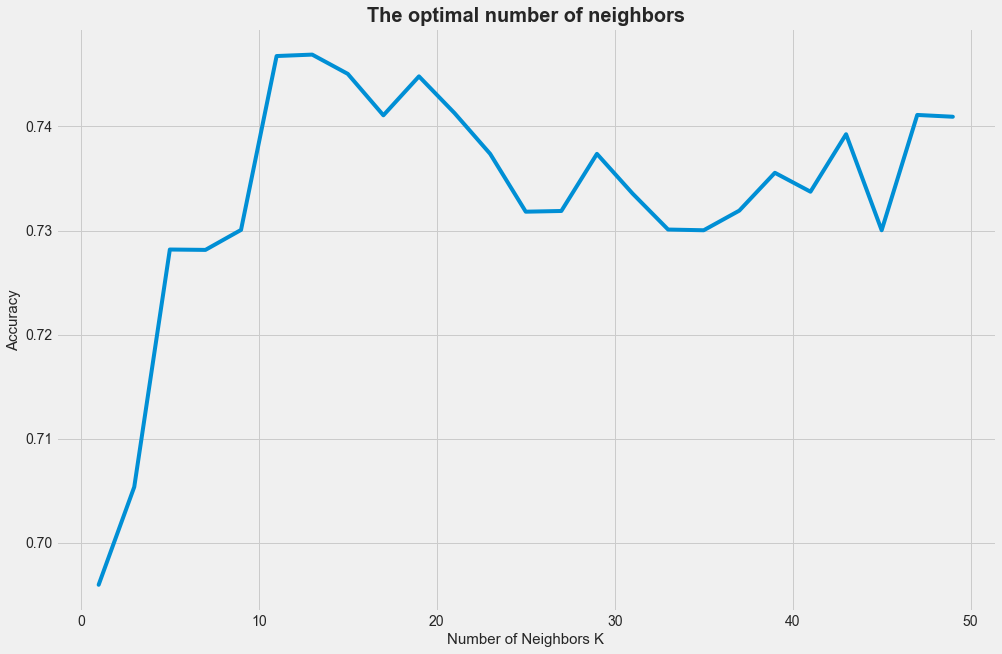

In [59]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

### State the best model based on accuracy and K value? Why did you choose this model? 

The optimal model is at K = 11. This is the place where the accuracy is the highest.